In [1]:
import pandas as pd
from pathlib import Path

path = "../data/evaluations/1.4/evaluation_results.csv"

eval_results = pd.read_csv(path)

In [2]:
eval_results

,model,prompt,groundtruth,response,image_path,judge_label,judge_reason
0,granite3.2-vision:2b,Break down the diagram into its components and...,"Database searches n=408, Conference abstracts ...",\nDatabase searches n=408 is connected with Re...,data/diagram_image_to_text/diagram_image_to_te...,False,Assistant response contains incorrect numbers ...
1,granite3.2-vision:2b,Detail the hierarchical structure of the compo...,If Got the first dose? is Yes then 1 dose and ...,\nIf Got the first dose? is No/Don't know then...,data/diagram_image_to_text/diagram_image_to_te...,False,Assistant incorrectly states that 'No/Don't kn...
2,granite3.2-vision:2b,Delineate the roles of the components within t...,Hans Albert Einstein is Son of Albert Einstein...,\nHans Albert Einstein is Son of Albert Einste...,data/diagram_image_to_text/diagram_image_to_te...,False,The response incorrectly states Hans Albert Ei...
3,granite3.2-vision:2b,Analyze the diagram and describe the dependenc...,Sensor is connected with Arduino which is then...,\nSensor is connected with Arduino which is th...,data/diagram_image_to_text/diagram_image_to_te...,True,Assistant response matches ground truth and im...
4,granite3.2-vision:2b,Detail the cause-and-effect relationships with...,Inferred OD is connected with Get array of pat...,\nInfered OD is connected with Get array of pa...,data/diagram_image_to_text/diagram_image_to_te...,False,Assistant incorrectly describes connections be...
...,...,...,...,...,...,...,...
175,qwen2.5vl:3b,Can you break down the data visualization and ...,This statistic shows the gross value added (GV...,This statistic shows the gross value added (GV...,data/chart2text/chart2text5.png,False,The response incorrectly identifies the indust...
176,qwen2.5vl:3b,Explain what this graph is communicating.,The production of flue-cured tobacco in India ...,This statistic shows the tobacco production in...,data/chart2text/chart2text6.png,True,The assistant's response correctly states the ...
177,qwen2.5vl:3b,Can you break down the data visualization and ...,One-fifth of the respondents in Poland are in ...,The data visualization presents the reasons wh...,data/chart2text/chart2text7.png,False,The assistant incorrectly states the survey wa...
178,qwen2.5vl:3b,Please clarify the meaning conveyed by this gr...,This statistic shows the number of Apple store...,This statistic shows the number of stores of t...,data/chart2text/chart2text8.png,False,The response incorrectly identifies the store ...


In [6]:
eval_results.loc[eval_results["judge_reason"] == "INVALID_JSON", "judge_label"] = "INVALID_JSON"
eval_results[eval_results["judge_reason"] == "INVALID_JSON"]

,model,prompt,groundtruth,response,image_path,judge_label,judge_reason
40,llava:7b,Summarize the interactions among the component...,Source is connected with Amplification which i...,The diagram appears to represent a simplified...,data/diagram_image_to_text/diagram_image_to_te...,INVALID_JSON,INVALID_JSON
79,qwen3-vl:2b,Could you shed some light on the insights conv...,Hawaii has taken part in 16 U.S presidential e...,This bar chart from Statista illustrates **GDP...,data/chart2text/chart2text12.png,INVALID_JSON,INVALID_JSON
86,qwen3-vl:2b,Explain what this graph is communicating.,The production of flue-cured tobacco in India ...,This graph is a line chart illustrating the **...,data/chart2text/chart2text6.png,INVALID_JSON,INVALID_JSON
156,qwen2.5vl:3b,Summarize the interactions among the component...,Memory is connected with Tx: Epely maneuver wh...,The diagram outlines a process involving memor...,data/diagram_image_to_text/diagram_image_to_te...,INVALID_JSON,INVALID_JSON
171,qwen2.5vl:3b,Can you break down the data visualization and ...,Public confidence in Trump on most key issues ...,The data visualization presents a breakdown of...,data/chart2text/chart2text14.png,INVALID_JSON,INVALID_JSON


In [3]:
eval_results.columns

Index(['model', 'prompt', 'groundtruth', 'response', 'image_path',
       'judge_label', 'judge_reason'],
      dtype='object')

In [10]:
import pandas as pd

# 1. Basic Cleanup: Remove any rows that are actually just copies of the header
# (Using 'model' as the reference column)
df = eval_results

# 2. Update 'judge_label' to 'INVALID_JSON' based on the 'judge_reason'
df.loc[df["judge_reason"] == "INVALID_JSON", "judge_label"] = "INVALID_JSON"

# 3. Clean strings to ensure 'true' and 'True' are counted together
df["judge_label"] = df["judge_label"].astype(str).str.lower()

# 4. Count the number of true, false, and invalid_json per model
counts = pd.crosstab(df['model'], df['judge_label'])

# 5. Calculate Accuracy (true / total)
counts['accuracy'] = (counts.get('true', 0) / counts.sum(axis=1)).map("{:.2%}".format)
counts = counts.sort_values(by='accuracy', ascending=False)

print(counts)

judge_label           false  invalid_json  true accuracy
model                                                   
qwen3-vl:2b              18             2    10   33.33%
granite3.2-vision:2b     21             0     9   30.00%
qwen2.5vl:3b             23             2     5   16.67%
llava-llama3:8b          30             0     0    0.00%
llava:7b                 29             1     0    0.00%
moondream:1.8b           30             0     0    0.00%


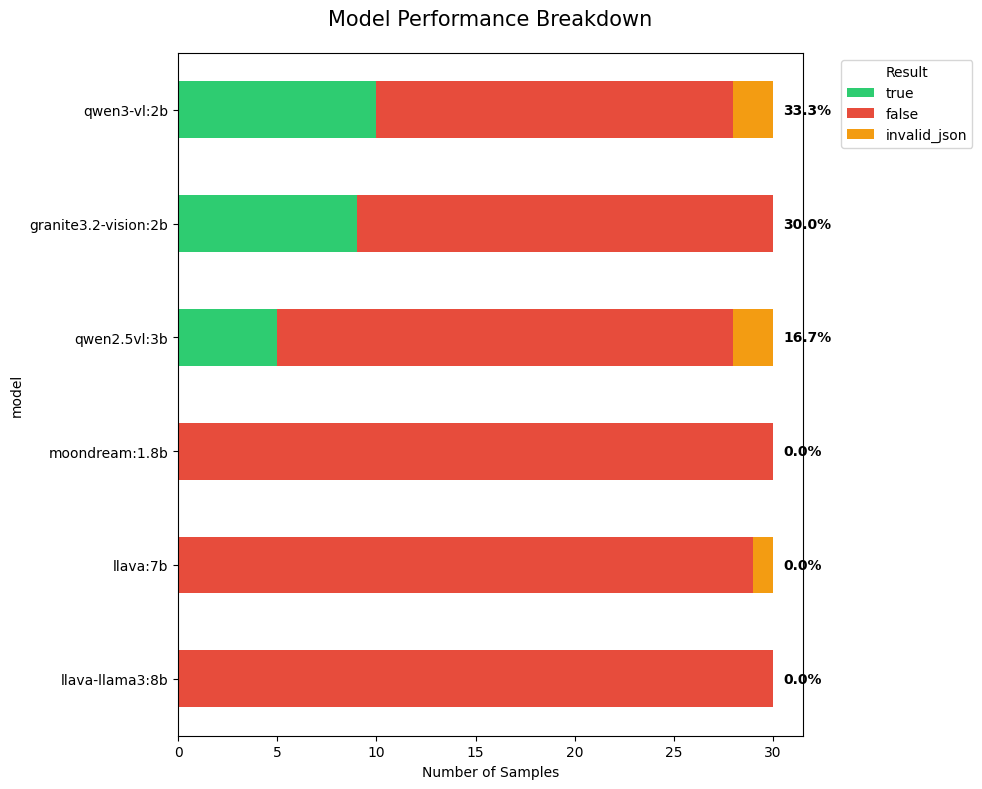

<Figure size 640x480 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt

# 1. Re-calculate accuracy as a float (numeric) to be safe
counts['accuracy'] = counts.get('true', 0) / (counts.get('true', 0) + counts.get('false', 0) + counts.get('invalid_json', 0))

# 2. Sort again (ensures plot order is correct)
plot_df = counts.sort_values(by='accuracy', ascending=True)

# 3. Define columns to plot
cols_to_plot = [c for c in ['true', 'false', 'invalid_json'] if c in plot_df.columns]

# 4. Create the plot
ax = plot_df[cols_to_plot].plot(
    kind='barh', 
    stacked=True, 
    figsize=(10, 8),
    color=['#2ecc71', '#e74c3c', '#f39c12'] # Green, Red, Orange
)

# 5. Add the labels (The fix is here!)
for i, (idx, row) in enumerate(plot_df.iterrows()):
    # Calculate the total width of the bar for label placement
    total = row[cols_to_plot].sum()
    
    # Ensure acc is treated as a float
    acc = float(row['accuracy']) 
    
    # Place the text at the end of the bar
    plt.text(total + 0.5, i, f"{acc:.1%}", va='center', fontweight='bold')

plt.title('Model Performance Breakdown', fontsize=15, pad=20)
plt.xlabel('Number of Samples')
plt.legend(title='Result', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
plt.savefig('../data/evaluations/1.4/metrics.png')